In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

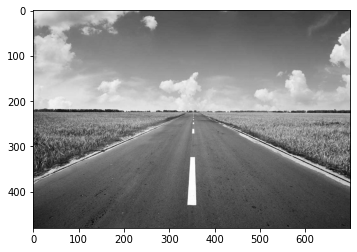

In [2]:
img = cv2.imread('data/road2.jpg')
img_gray = cv2.imread('data/road2.jpg',0)
plt.imshow(img_gray, cmap='gray')

In [3]:
h = img.shape[0] 
w = img.shape[1]
channel = img.shape[2]
h,w, channel

(480, 700, 3)

In [4]:
reginOfI = np.array([[0,480],[0,350],[350,210],[700,350],[700,480]])

In [5]:
mask = np.zeros_like(img_gray)
match_masked_color = 255

In [6]:
cv2.fillPoly(mask, [reginOfI], match_masked_color)
masked_img = cv2.bitwise_and(img_gray, mask)

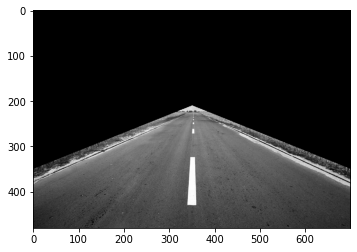

In [7]:
plt.imshow(masked_img, cmap='gray')

In [8]:
edges = cv2.Canny(masked_img, 255, 255, apertureSize=3)
masked_img2 = cv2.bitwise_and(edges, mask)
lines = cv2.HoughLinesP(masked_img2, 6, np.pi / 60, 160, minLineLength=40, maxLineGap = 25)
for line in lines:
    x1,y1,x2,y2 = line[0]
    #print(x1,y1,x2,y2)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

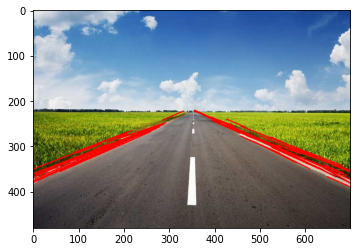

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))